# TO DO:
- for stripes only make it go to a specified distance to side, i.e. if padding is large not the whole screen
- turn of axes
- add docstrings and comments
- add stats.com dimensions
- add error messages/warnings, e.g. length/width ignored apart from tracab and tracab needs this.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

class Pitch(object):
    
    _pitch_dimensions = ['left','right','bottom','top','width','center_width','length','center_length',
                         'six_yard_from_side','six_yard_width','six_yard_length',
                         'penalty_area_from_side','penalty_area_width','penalty_area_length',
                         'left_penalty','right_penalty','circle_size',
                         'goal_width','goal_depth','goal_post',
                         'arc1_leftV','arc2_leftH']                         
    
    _opta_dimensions = {'left':100,'right':0,'bottom':0,'top':100,
                        'width':100,'center_width':50,'length':100,'center_length':50,
                        'six_yard_from_side':36.8,'six_yard_width':26.4,'six_yard_length':5.8,
                        'penalty_area_from_side':21.1,'penalty_area_width':57.8,'penalty_area_length':17.0,
                        'left_penalty':11.5,'right_penalty':88.5,'circle_size':9.15,
                        'goal_depth':1.9,'goal_width':10.76,'goal_post':44.62,
                        'arc1_leftV':None,'arc2_leftH':None}
    
    _statsbomb_dimensions = {'left':0,'right':80,'bottom':0,'top':120,
                             'width':80,'center_width':40,'length':120,'center_length':60,
                             'six_yard_from_side':30,'six_yard_width':20,'six_yard_length':6,
                             'penalty_area_from_side':18,'penalty_area_width':44,'penalty_area_length':18,
                             'left_penalty':12,'right_penalty':108,'circle_size':10.46,
                             'goal_depth':2.4,'goal_width':8,'goal_post':36,
                             'arc1_leftV':35,'arc2_leftH':55}
    
    _tracab_dimensions = {'left':None,'right':None,'bottom':None,'top':None,
                          'width':None,'center_width':0,'length':None,'center_length':0,
                          'six_yard_from_side':-916,'six_yard_width':1832,'six_yard_length':550,
                          'penalty_area_from_side':-2016,'penalty_area_width':4032,'penalty_area_length':1650,
                          'left_penalty':None,'right_penalty':None,'circle_size':915,
                          'goal_depth':200,'goal_width':732,'goal_post':-366,
                          'arc1_leftV':36.95,'arc2_leftH':53.05}  
     
    def __init__(self, *args, line_color='white', pitch_color='#aabb97', pitch_type='opta',
                 orientation='horizontal',view='full',xpad=(3,3),ypad=(3,3),lw=2,pitch_length=None,
                 n_stripes=0,stripe_color='#c2d59d',stripe_xpad=(0,0),stripe_ypad=(0,0),
                 pitch_width=None,figsize=None, layout=None,**kwargs):
        
                
        # set figure and axes attributes
        self.axes = None
        self.fig = None
        self.figsize = figsize
        self.layout = layout

        # set attributes
        self.line_color = line_color
        self.pitch_color = pitch_color
        self.pitch_length = pitch_length
        self.pitch_width = pitch_width
        self.lw = lw
        self.pitch_type = pitch_type      
        self.orientation = orientation
        self.view = view
        self.xpad_left, self.xpad_right = xpad
        self.ypad_left, self.ypad_right = ypad   
        self.n_stripes = n_stripes
        self.stripe_color = stripe_color
        self.stripe_xpad_left, self.stripe_xpad_right = stripe_xpad
        self.stripe_ypad_left, self.stripe_ypad_right = stripe_ypad
        
        # set pitch dimensions
        if pitch_type=='opta':
            for attr in self._pitch_dimensions:
                setattr(self, attr, self._opta_dimensions.get(attr, None))
            self.aspect = 68/105
            if self.orientation=='vertical':
                self.xpad_left = self.xpad_left * (100/68)
                self.xpad_right = self.xpad_right * (100/68)
                self.ypad_left = self.ypad_left * (100/105)
                self.ypad_right = self.ypad_right * (100/105)
                self.stripe_xpad_left = self.stripe_xpad_left * (100/68)
                self.stripe_ypad_left = self.stripe_ypad_left * (100/105)
                self.stripe_xpad_right = self.stripe_xpad_right * (100/68)
                self.stripe_ypad_right = self.stripe_ypad_right * (100/105)
            elif self.orientation=='horizontal':
                self.xpad_left = self.xpad_left * (100/105)
                self.xpad_right = self.xpad_right * (100/105)
                self.ypad_left = self.ypad_left * (100/68)
                self.ypad_right = self.ypad_right * (100/68)  
                self.stripe_xpad_left = self.stripe_xpad_left * (100/105)
                self.stripe_ypad_left = self.stripe_ypad_left * (100/68)
                self.stripe_xpad_right = self.stripe_xpad_right * (100/105)
                self.stripe_ypad_right = self.stripe_ypad_right * (100/68)
            
        elif pitch_type=='statsbomb':
            for attr in self._pitch_dimensions:
                setattr(self, attr, self._statsbomb_dimensions.get(attr, None))
            self.aspect = 1
            
        elif pitch_type=='tracab':
            for attr in self._pitch_dimensions:
                setattr(self, attr, self._tracab_dimensions.get(attr, None))
            self.aspect = 1
            self.left = pitch_width/2 * 100
            self.right = -(pitch_width/2) * 100
            self.bottom = -(pitch_length/2) * 100
            self.top = (pitch_length/2)*100
            self.width = pitch_width*100
            self.length = pitch_length * 100
            self.left_penalty = self.bottom + 1100
            self.right_penalty = self.top - 1100
            self.xpad_left = self.xpad_left*100
            self.ypad_left = self.ypad_left*100
            self.xpad_right = self.xpad_right*100
            self.ypad_right = self.ypad_right*100
            self.stripe_xpad_left = self.stripe_xpad_left*100
            self.stripe_xpad_right = self.stripe_xpad_right*100
            self.stripe_ypad_left = self.stripe_ypad_left*100
            self.stripe_ypad_right = self.stripe_ypad_right*100
            
    def _setup_subplots(self):
        
        if self.layout == None:
            nrows = 1
            ncols = 1            
            fig, axes = plt.subplots(nrows=nrows, ncols=ncols,figsize=self.figsize)
            axes = np.array([axes])
        
        else:
            nrows, ncols = self.layout
            if nrows>1 or ncols>1:
                fig, axes = plt.subplots(nrows=nrows, ncols=ncols,figsize=self.figsize)
                axes = axes.ravel()
            else:
                fig, axes = plt.subplots(nrows=nrows, ncols=ncols,figsize=self.figsize)
                axes = np.array([axes])
                
        self.fig = fig
        self.axes = axes
        
                 
    def _set_axes(self):
        # set up vertical pitch
        if self.orientation=='vertical':
            if self.view=='full':
                for ax in self.axes:
                    ax.set_aspect(1/self.aspect)
                    if self.pitch_type=='statsbomb':
                        ax.set_xlim(self.left-self.xpad_left,self.right+self.xpad_right)
                        ax.axvspan(self.left-self.xpad_left,self.right+self.xpad_right,0,1,facecolor=self.pitch_color)
                    elif self.pitch_type in ['tracab','opta']:
                        ax.set_xlim(self.left+self.xpad_left,self.right-self.xpad_right)
                        ax.axvspan(self.left+self.xpad_left,self.right-self.xpad_right,0,1,facecolor=self.pitch_color)
                    ax.set_ylim(self.bottom-self.ypad_left,self.top+self.ypad_right)
                    
            elif self.view=='half':
                for ax in self.axes:
                    ax.set_aspect(1/self.aspect)
                    if self.pitch_type=='statsbomb':
                        ax.set_xlim(self.left-self.xpad_left,self.right+self.xpad_right)
                        ax.axvspan(self.left-self.xpad_left,self.right+self.xpad_right,0,1,facecolor=self.pitch_color) 
                    elif self.pitch_type in ['tracab','opta']:
                        ax.set_xlim(self.left+self.xpad_left,self.right-self.xpad_right)
                        ax.axvspan(self.left+self.xpad_left,self.right-self.xpad_right,0,1,facecolor=self.pitch_color)
                    ax.set_ylim(self.center_length-self.ypad_left,self.top+self.ypad_right)                      
                        
        # set up horizontal pitch
        elif self.orientation=='horizontal':
            if self.view=='full':
                for ax in self.axes:
                    ax.set_aspect(self.aspect)
                    if self.pitch_type=='statsbomb':
                        ax.set_ylim(self.right+self.ypad_left,self.left-self.ypad_right)
                        ax.axhspan(self.right+self.ypad_left,self.left-self.ypad_right,0,1,facecolor=self.pitch_color)
                    elif self.pitch_type in ['tracab','opta']:
                        ax.set_ylim(self.right-self.ypad_left,self.left+self.ypad_right)
                        ax.axhspan(self.right-self.ypad_left,self.left+self.ypad_right,0,1,facecolor=self.pitch_color) 
                    ax.set_xlim(self.bottom-self.xpad_left,self.top+self.xpad_right)
                                          
            elif self.view=='half':
                for ax in self.axes:
                    ax.set_aspect(self.aspect)
                    if self.pitch_type=='statsbomb':
                        ax.set_ylim(self.right+self.ypad_left,self.left-self.ypad_right)
                        ax.axhspan(self.right+self.ypad_left,self.left-self.ypad_right,0,1,facecolor=self.pitch_color)
                    elif self.pitch_type in ['tracab','opta']:
                        ax.set_ylim(self.right-self.ypad_left,self.left+self.ypad_right)
                        ax.axhspan(self.right-self.ypad_left,self.left+self.ypad_right,0,1,facecolor=self.pitch_color)
                    ax.set_xlim(self.center_length-self.xpad_left,self.top+self.xpad_right)
                    
    def _draw_stripes(self):
        if self.pitch_type=='statsbomb':
            width = self.right - self.left
        elif self.pitch_type in ['tracab','opta']:
            width = self.left-self.right
    
        # draw stripes for vertical pitch
        if self.orientation=='vertical':
            len_stripe = (self.top-self.bottom+self.stripe_ypad_right)/(self.n_stripes*2)
            total_width = width + self.xpad_left + self.xpad_right
            start = max(self.xpad_left - self.stripe_xpad_left,0)/total_width
            end = min((self.xpad_left + width + self.stripe_xpad_right)/total_width,1)
            print(start,end)
            #print(self.stripe_xpad/total_width,(width+self.stripe_xpad*2)/total_width)
            for ax in self.axes:
                for i in range(0, self.n_stripes):
                    ax.axhspan(len_stripe + (i*len_stripe*2) + self.bottom,
                               len_stripe + (len_stripe + (i*len_stripe*2)) + self.bottom,
                               start,end,facecolor=self.stripe_color)
                    
        # draw stripes for horizontal pitch
        elif self.orientation=='horizontal':
            len_stripe = (self.top-self.bottom+self.stripe_xpad_right)/(self.n_stripes*2)
            total_width = width + self.ypad_left + self.ypad_right
            start = max(self.ypad_left - self.stripe_ypad_left,0)/total_width
            end = min((self.ypad_left + width + self.stripe_ypad_right)/total_width,1)
            print(start,end)
            #print(self.stripe_ypad/total_width,(width+self.stripe_ypad*2)/total_width)
            for ax in self.axes:
                for i in range(0, self.n_stripes):
                    ax.axvspan(len_stripe + (i*len_stripe*2) + self.bottom,
                               len_stripe + (len_stripe + (i*len_stripe*2)) + self.bottom,
                               start,end,facecolor=self.stripe_color)
        
        
                        
    def _draw_pitch_lines(self):
        for ax in self.axes:
            if self.orientation=='horizontal':
                if self.pitch_type=='statsbomb':
                    pitch_markings = patches.Rectangle((self.bottom,self.left),self.length,self.width,
                                                       fill=False,lw=self.lw,color=self.line_color)
                else:
                    pitch_markings = patches.Rectangle((self.bottom,self.right),self.length,self.width,
                                                       fill=False,lw=self.lw,color=self.line_color)
                midline = patches.ConnectionPatch([self.center_length,self.left],
                                                  [self.center_length,self.right],'data','data',
                                                  lw=self.lw,color=self.line_color)
            elif self.orientation=='vertical':
                if self.pitch_type=='statsbomb':
                    pitch_markings = patches.Rectangle((self.left,self.bottom),self.width,self.length,
                                                   fill=False,lw=self.lw,color=self.line_color)  
                else:
                    pitch_markings = patches.Rectangle((self.right,self.bottom),self.width,self.length,
                                                       fill=False,lw=self.lw,color=self.line_color)
                midline = patches.ConnectionPatch([self.left,self.center_length],
                                                  [self.right,self.center_length],'data','data',
                                                  lw=self.lw,color=self.line_color)
            ax.add_patch(pitch_markings)
            ax.add_patch(midline)
    
    def _draw_goals(self):
        for ax in self.axes:
            if self.orientation=='horizontal':
                goal1 = patches.Rectangle((self.top,self.goal_post),self.goal_depth,self.goal_width,
                                          fill=False,lw=self.lw,color=self.line_color,alpha=0.7)
                goal2 = patches.Rectangle((self.bottom-self.goal_depth,self.goal_post),self.goal_depth,self.goal_width,
                                          fill=False,lw=self.lw,color=self.line_color,alpha=0.7)
            elif self.orientation=='vertical':
                goal1 = patches.Rectangle((self.goal_post,self.top),self.goal_width,self.goal_depth,
                                          fill=False,lw=self.lw,color=self.line_color,alpha=0.7)
                goal2 = patches.Rectangle((self.goal_post,self.bottom-self.goal_depth),self.goal_width,self.goal_depth,
                                          fill=False,lw=self.lw,color=self.line_color,alpha=0.7)
            ax.add_patch(goal1)
            ax.add_patch(goal2) 
            
    def _boxes(self,box_from_side,box_length,box_width,ax):
        if self.orientation=='horizontal':
            box1 = patches.Rectangle((self.bottom,box_from_side),box_length,box_width,
                                     fill=False,lw=self.lw,color=self.line_color)
            box2 = patches.Rectangle((self.top-box_length,box_from_side),box_length,box_width,
                                     fill=False,lw=self.lw,color=self.line_color)
        elif self.orientation=='vertical':
            box1 = patches.Rectangle((box_from_side,self.bottom),box_width,box_length,
                                     fill=False,lw=self.lw,color=self.line_color)
            box2 = patches.Rectangle((box_from_side,self.top-box_length),box_width,box_length,
                                     fill=False,lw=self.lw,color=self.line_color)
        ax.add_patch(box1)
        ax.add_patch(box2)
        
    def _draw_boxes(self):
        for ax in self.axes:
            self._boxes(self.six_yard_from_side,self.six_yard_length,self.six_yard_width,ax)
            self._boxes(self.penalty_area_from_side,self.penalty_area_length,self.penalty_area_width,ax)
            
    def _draw_circles_and_arcs(self):
        size_spot = 0.005 * self.length
        if self.orientation=='vertical':
            xy = (self.center_width,self.center_length)
            center = (self.center_width,self.center_length)
            penalty1 = (self.center_width,self.left_penalty)
            penalty2 = (self.center_width,self.right_penalty)
            arc1_theta1 = self.arc1_leftV
            arc1_theta2 = 180 - self.arc1_leftV
            arc2_theta1 = 180 + self.arc1_leftV
            arc2_theta2 = 360 - self.arc1_leftV
            
        elif self.orientation=='horizontal':
            xy = (self.center_length,self.center_width)
            center = (self.center_length,self.center_width)
            penalty1 = (self.left_penalty,self.center_width)
            penalty2 = (self.right_penalty,self.center_width)
            arc1_theta2 = self.arc2_leftH
            arc1_theta1 = 360 - self.arc2_leftH
            arc2_theta1 = 180 - self.arc2_leftH
            arc2_theta2 = 180 + self.arc2_leftH                

        for ax in self.axes:
            circle = patches.Circle(xy,self.circle_size,lw=self.lw,color=self.line_color, fill=False)
            center_spot = patches.Circle(center,size_spot,color=self.line_color)
            penalty1_spot = patches.Circle(penalty1,size_spot,color=self.line_color)
            penalty2_spot = patches.Circle(penalty2,size_spot,color=self.line_color)
            arc1_patch = patches.Arc(penalty1,self.circle_size*2,self.circle_size*2,
                                     theta1=arc1_theta1,theta2=arc1_theta2,
                                     lw=self.lw,color=self.line_color,fill=False)
            arc2_patch = patches.Arc(penalty2,self.circle_size*2,self.circle_size*2,
                                     theta1=arc2_theta1,theta2=arc2_theta2,
                                     lw=self.lw,color=self.line_color,fill=False)
            ax.add_patch(circle)
            ax.add_patch(center_spot)
            ax.add_patch(penalty1_spot)  
            ax.add_patch(penalty2_spot)  
            ax.add_patch(arc1_patch)
            ax.add_patch(arc2_patch)  
                
    def _draw_scaled_circles_and_arcs(self):
        if self.pitch_type=='opta':
            scaled_circle1 = self.circle_size*100/68
            scaled_circle2 = self.circle_size*100/105
            scaled_spot1 = self.length/(2*68)
            scaled_spot2 = self.length/(2*105)
            xy = (self.center_width,self.center_length)
            
        if self.orientation=='vertical':
            xy1 = (self.center_width+scaled_circle1,self.center_length)
            xy2 = (self.center_width,self.center_length+scaled_circle2)
            spot1 = (self.center_width,self.left_penalty)
            spot2 = (self.center_width,self.right_penalty)
            center_spot = (self.center_width,self.center_length)
            p1 = (self.center_width+scaled_spot1,self.left_penalty)
            p2 = (self.center_width,self.left_penalty+scaled_spot2)
            if self.pitch_type=='opta':
                # intersection of box and arc = self.center_width-10.745292702287907
                arc_pen_top1 = (self.center_width-10.745292702287907, self.penalty_area_length)
                

        elif self.orientation=='horizontal':
            xy1 = (self.center_width+scaled_circle2,self.center_length)
            xy2 = (self.center_width,self.center_length+scaled_circle1)
            spot1 = (self.left_penalty,self.center_width)
            spot2 = (self.right_penalty,self.center_width)
            center_spot = (self.center_length,self.center_width)
            p2 = (self.left_penalty,self.center_width+scaled_spot1)
            p1 = (self.left_penalty+scaled_spot2,self.center_width)
            if self.pitch_type=='opta':
                # intersection of box and arc = self.center_width-10.745292702287907
                arc_pen_top1 = (self.penalty_area_length,self.center_width-10.745292702287907)
        
        def to_ax_coord(ax,coord_system,point):
            return coord_system.inverted().transform(ax.transData.transform_point(point))
        
        for ax in self.axes:
            ax_coordinate_system = ax.transAxes
            ax_xy = to_ax_coord(ax,ax_coordinate_system,xy)
            ax_spot1 = to_ax_coord(ax,ax_coordinate_system,spot1)
            ax_spot2 = to_ax_coord(ax,ax_coordinate_system,spot2)
            ax_center = to_ax_coord(ax,ax_coordinate_system,center_spot)
            ax_xy1 = to_ax_coord(ax,ax_coordinate_system,xy1)
            ax_xy2 = to_ax_coord(ax,ax_coordinate_system,xy2)
            ax_p1 = to_ax_coord(ax,ax_coordinate_system,p1)
            ax_p2 = to_ax_coord(ax,ax_coordinate_system,p2)
            ax_arc_pen_top1 = to_ax_coord(ax,ax_coordinate_system,arc_pen_top1) 
            diameter1 = (ax_xy1[0] - ax_xy[0])*2
            diameter2 = (ax_xy2[1] - ax_xy[1])*2
            diameter_spot1 = (ax_p1[0] - ax_spot1[0])*2
            diameter_spot2 = (ax_p2[1] - ax_spot1[1])*2
                
            if self.orientation=='vertical':
                a = ax_spot1[0] - ax_arc_pen_top1[0]
                o = ax_arc_pen_top1[1] - ax_spot1[1]
                arc1_left = np.degrees(np.arctan(o/a))
                arc1_right = 180 - arc1_left
                arc2_left = 180 + arc1_left
                arc2_right = 360 - arc1_left
                    
            elif self.orientation=='horizontal':
                a = ax_arc_pen_top1[0] - ax_spot1[0]
                o = ax_spot1[1] - ax_arc_pen_top1[1]  
                arc1_right = np.degrees(np.arctan(o/a))
                arc1_left = 360 - arc1_right
                arc2_left = 180 - arc1_right
                arc2_right = 180 + arc1_right
                
            circle = patches.Ellipse(ax_xy, diameter1, diameter2,transform=ax_coordinate_system,fill=False,
                                     lw=self.lw,color=self.line_color)
            penalty_spot1 = patches.Ellipse(ax_spot1, diameter_spot1, diameter_spot2,
                                            transform=ax_coordinate_system,
                                            lw=self.lw,color=self.line_color)
            penalty_spot2 = patches.Ellipse(ax_spot2, diameter_spot1, diameter_spot2,
                                            transform=ax_coordinate_system,
                                            lw=self.lw,color=self.line_color)
            kick_off_spot = patches.Ellipse(ax_center, diameter_spot1, diameter_spot2,
                                            transform=ax_coordinate_system,
                                            lw=self.lw,color=self.line_color)
            arc1_patch = patches.Arc(ax_spot1,diameter1, diameter2,transform=ax_coordinate_system,fill=False,
                                     theta1=arc1_left,theta2=arc1_right,
                                     lw=self.lw,color=self.line_color)
            arc2_patch = patches.Arc(ax_spot2,diameter1, diameter2,transform=ax_coordinate_system,fill=False,
                                     theta1=arc2_left,theta2=arc2_right,
                                     lw=self.lw,color=self.line_color)
                
            ax.add_patch(penalty_spot1)
            ax.add_patch(penalty_spot2)
            ax.add_patch(kick_off_spot)
            ax.add_patch(circle)
            ax.add_patch(arc1_patch)     
            ax.add_patch(arc2_patch)     

    def draw(self):
        self._setup_subplots()
        self._set_axes()
        if self.n_stripes>0:
            self._draw_stripes()
        self._draw_pitch_lines()
        self._draw_goals()
        self._draw_boxes()
        if self.aspect == 1:
            self._draw_circles_and_arcs()
        else:
            self._draw_scaled_circles_and_arcs()

# Opta

#### Opta vertical full

0.04054054054054055 0.9594594594594595


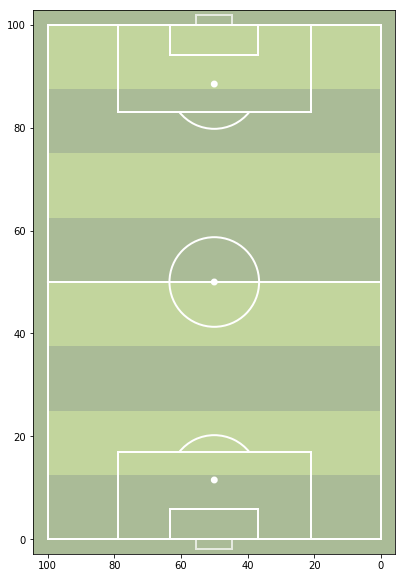

In [2]:
pitch = Pitch(pitch_type='opta',orientation='vertical',view='full',layout=(1,1),figsize=(10,10),n_stripes=4)
pitch.draw()

#### Opta horizontal full

0.04054054054054055 0.9594594594594595


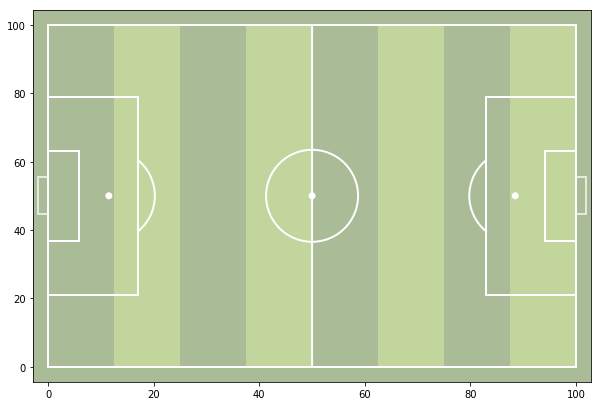

In [3]:
pitch = Pitch(pitch_type='opta',orientation='horizontal',view='full',layout=(1,1),figsize=(10,10),n_stripes=4)
pitch.draw()

#### Opta vertical half

0.04054054054054055 0.9594594594594595


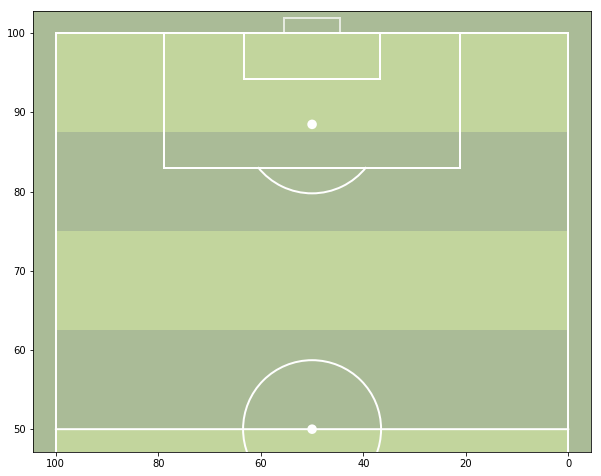

In [4]:
pitch = Pitch(pitch_type='opta',orientation='vertical',view='half',layout=(1,1),figsize=(10,10),n_stripes=4)
pitch.draw()

#### Opta Horizontal half

0.04054054054054055 0.9594594594594595


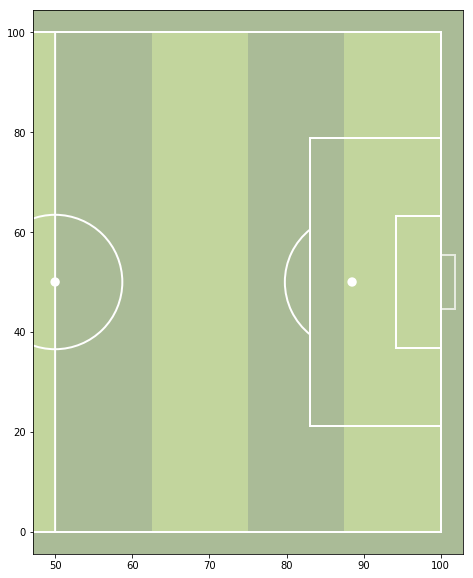

In [5]:
pitch = Pitch(pitch_type='opta',orientation='horizontal',view='half',layout=(1,1),figsize=(10,10),n_stripes=4)
pitch.draw()

# Statsbomb

#### Statsbomb vertical full

0.03488372093023256 0.9651162790697675


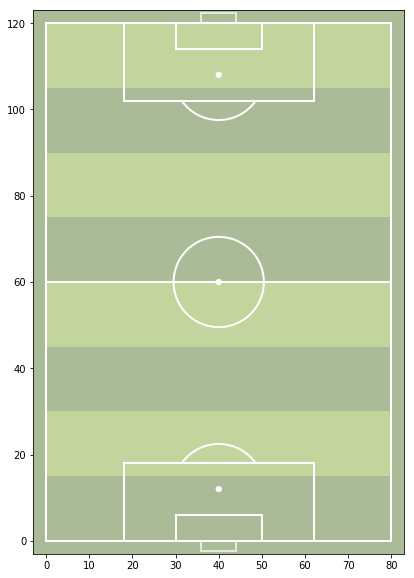

In [6]:
pitch = Pitch(pitch_type='statsbomb',orientation='vertical',view='full',figsize=(10,10),n_stripes=4)
pitch.draw()

## Statsbomb horizontal full

0.03488372093023256 0.9651162790697675


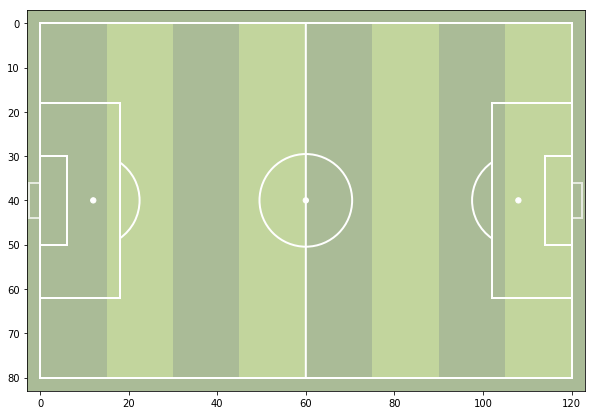

In [7]:
pitch = Pitch(pitch_type='statsbomb',orientation='horizontal',view='full',layout=(1,1),figsize=(10,10),n_stripes=4)
pitch.draw()

#### Statsbomb vertical half

0.03488372093023256 0.9651162790697675


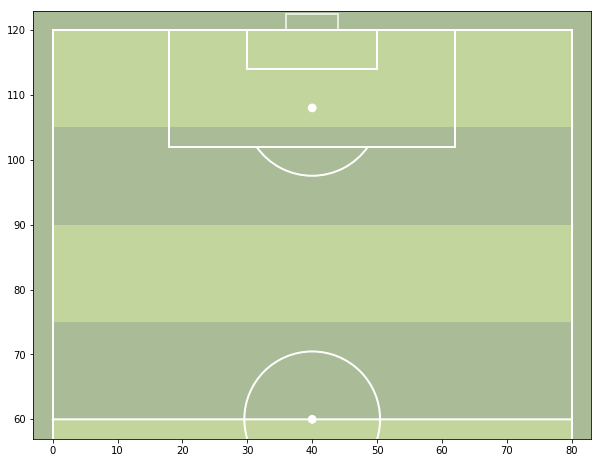

In [8]:
pitch = Pitch(pitch_type='statsbomb',orientation='vertical',view='half',layout=(1,1),figsize=(10,10),n_stripes=4)
pitch.draw()

#### Statsbomb Horizontal half

0.03488372093023256 0.9651162790697675


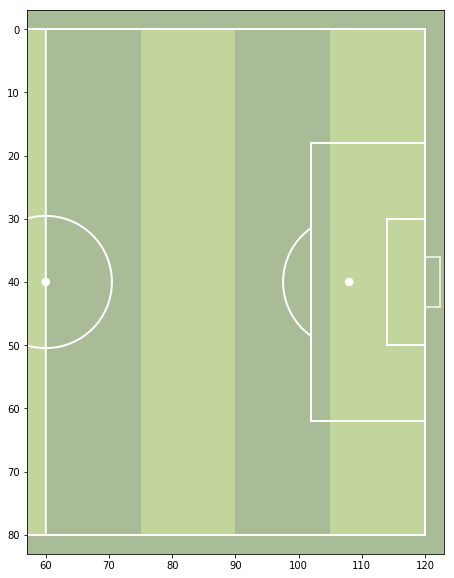

In [9]:
pitch = Pitch(pitch_type='statsbomb',orientation='horizontal',view='half',layout=(1,1),figsize=(10,10),n_stripes=4)
pitch.draw()

# Tracab

#### Tracab vertical full

0.04054054054054054 0.9594594594594594


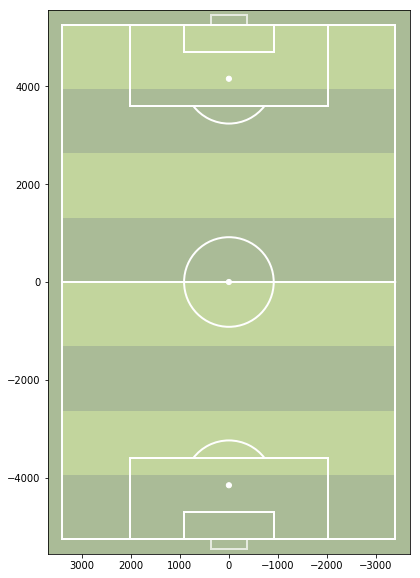

In [10]:
pitch = Pitch(pitch_type='tracab',orientation='vertical',view='full',layout=(1,1),figsize=(10,10),
                  pitch_width=68,pitch_length=105,n_stripes=4)
pitch.draw()

#### Tracab horizontal full

0.04054054054054054 0.9594594594594594


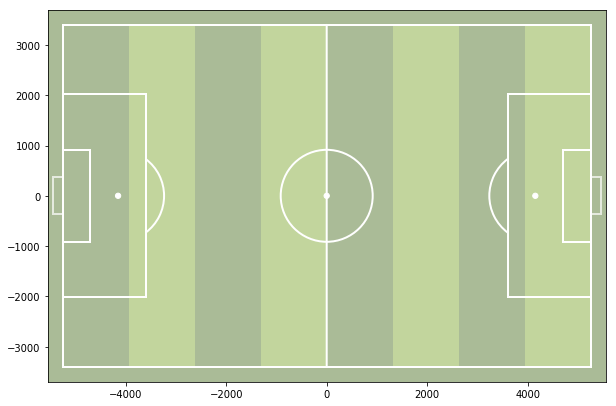

In [11]:
pitch = Pitch(pitch_type='tracab',orientation='horizontal',view='full',layout=(1,1),figsize=(10,10),
                  pitch_width=68,pitch_length=105,n_stripes=4)
pitch.draw()

#### Tracab vertical half

0.04054054054054054 0.9594594594594594


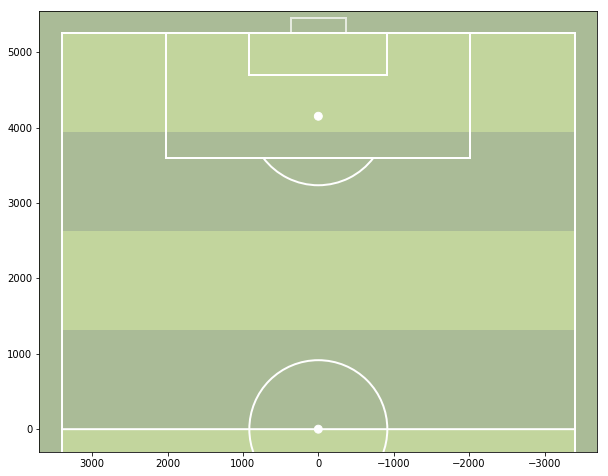

In [12]:
pitch = Pitch(pitch_type='tracab',orientation='vertical',view='half',layout=(1,1),figsize=(10,10),
                  pitch_width=68,pitch_length=105,n_stripes=4)
pitch.draw()

#### Tracab Horizontal half

0.0 0.6296296296296297


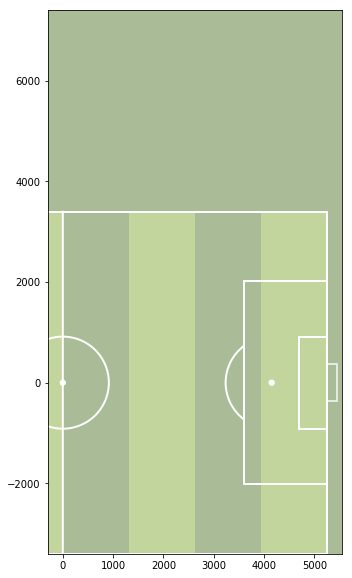

In [13]:
pitch = Pitch(pitch_type='tracab',orientation='horizontal',view='half',layout=(1,1),figsize=(10,10),
                  pitch_width=68,pitch_length=105,n_stripes=4,ypad=(0,40))
pitch.draw()